In [66]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import colorsys
import matplotlib.patches as patches
import copy

In [2]:
annotation_path = './data/train_r1.txt'
log_dir = 'logs/000/'
classes_path = 'model_data/danger.txt'
anchors_path = 'model_data/yolo_anchors.txt'
class_names = ['fefire','blfire','knife','bat','shear']

In [3]:
val_split = 0.1
with open(annotation_path) as f:
    lines = f.readlines()
np.random.seed(10)
np.random.shuffle(lines)
num_val = int(len(lines)*val_split)
num_train = len(lines) - num_val

train_data = lines[:num_train]
val_data = lines[num_train:]

In [5]:
def get_data(annotation_line):
    line = annotation_line.split()
    image = Image.open(line[0])
    iw, ih = image.size
    box = np.array([np.array(list(map(int,box.split(',')))) for box in line[1:]])
    return image,box
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def display_boxes(image, boxesid, class_names,
                      scores=None, title="",
                      figsize=(16, 16), ax=None):
    N = boxesid.shape[0]
    
    # Generate random colors
    colors = random_colors(N)
    
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
    # Show area outside image boundaries.
    height, width = image.height,image.width
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(title)
    for i in range(N):
        color = colors[i]
        x1, y1, x2, y2,cls = boxesid[i]
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=5,
                              alpha=0.7, linestyle="dashed",
                              edgecolor=color, facecolor='none')
        ax.add_patch(p)
        score = scores[i] if scores is not None else None
        label = class_names[cls]
        x = random.randint(x1, (x1 + x2) // 2)
        caption = "{} {:.3f}".format(label, score) if score else label
        ax.text(x1, y1 + 8, caption,
                color='b', size=15, backgroundcolor="none")
        ax.imshow(image)

In [79]:
def RandomResize(img,box):
    re_size = np.random.uniform(0.5,1.8)
    img = img.resize((int(img.width*re_size), int(img.height*re_size)),Image.ANTIALIAS)
    new_box = copy.deepcopy(box)
    for i in range(box.shape[0]):
        new_box[i][0:4]=(new_box[i][0:4]*re_size).astype(np.int64)
    return img,new_box

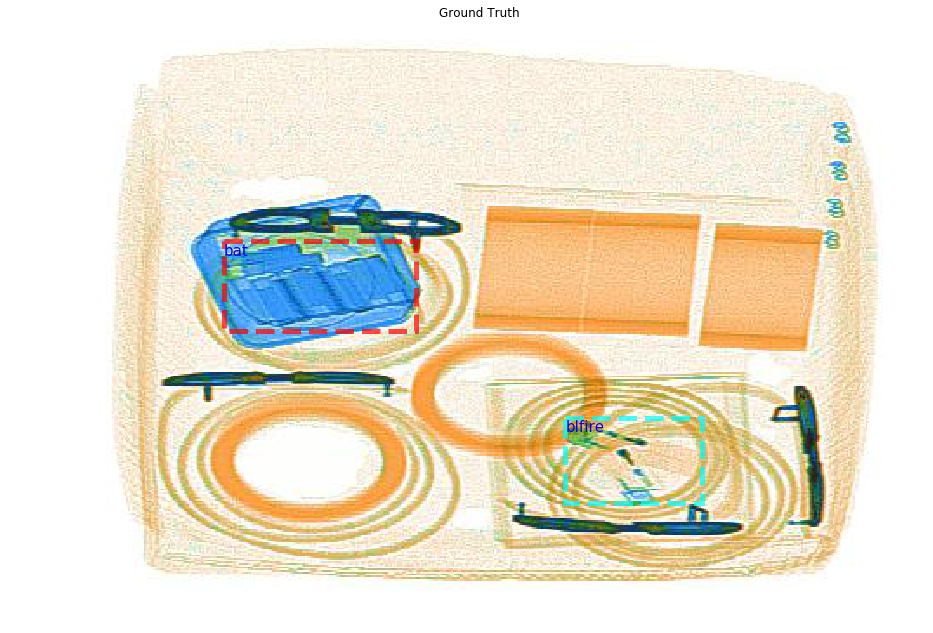

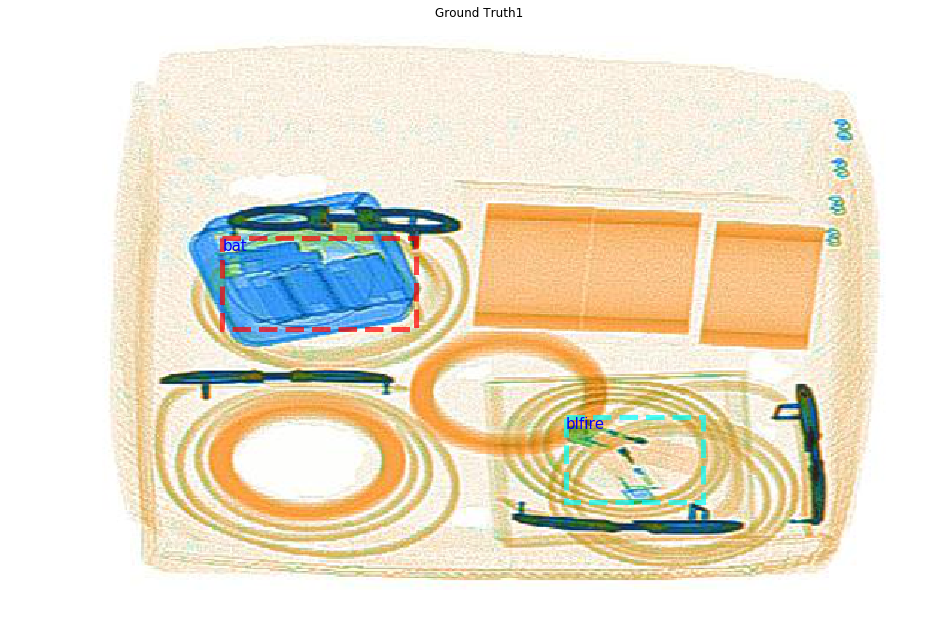

In [87]:
data = train_data[random.randint(0,len(train_data))]
img,box = get_data(data)
img1,box1 = RandomResize(img,box)
# fig = plt.figure(figsize=(16,32))
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)
display_boxes(img,box,class_names,title="Ground Truth")
display_boxes(img1,box1,class_names,title="Ground Truth1")
plt.show()

In [88]:
img.size,img1.size

((495, 318), (580, 372))

In [45]:
np.array(img).shape

(520, 660, 3)

In [82]:
box[0][0:3].dtype

dtype('int64')

In [83]:
box

array([[338, 397, 391, 426,   3],
       [249, 376, 283, 398,   3],
       [267, 224, 319, 296,   1]])

In [84]:
box1

array([[605, 710, 700, 762,   3],
       [445, 673, 506, 712,   3],
       [478, 401, 571, 529,   1]])

In [78]:
box[0][0:3]

array([ 40, 332,  95])

In [99]:
out1 = img.rotate(20)

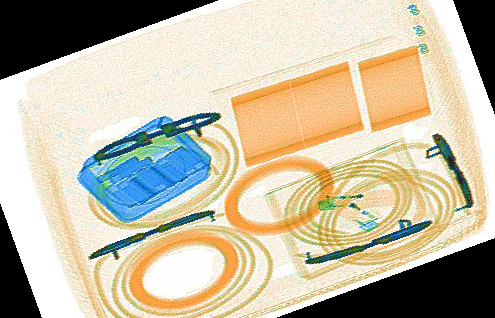

In [100]:
out1

In [120]:
def rotate_point(height,width,point,cita):
    x1,y1 = point
    x2 = int(width/2)
    y2 = int(height/2)
    x1 = x1
    y1 = height - y1
    x2 = x2
    y2 = height - y2
    x = (x1 - x2)*np.cos(np.pi / 180.0 * cita) - (y1 - y2)*np.sin(np.pi / 180.0 * cita) + x2
    y = (x1 - x2)*np.sin(np.pi / 180.0 * cita) + (y1 - y2)*np.cos(np.pi / 180.0 * cita) + y2
    x = x
    y = height - y
    return (int(x),int(y))

In [121]:
point1 = (box[0][0],box[0][1])
point2 = (box[0][2],box[0][1])
point3 = (box[0][0],box[0][3])
point4 = (box[0][2],box[0][3])

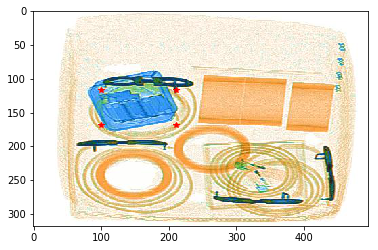

In [122]:
plt.imshow(img)
plt.plot(point1[0],point1[1],'r*')
plt.plot(point2[0],point2[1],'r*')
plt.plot(point3[0],point3[1],'r*')
plt.plot(point4[0],point4[1],'r*')

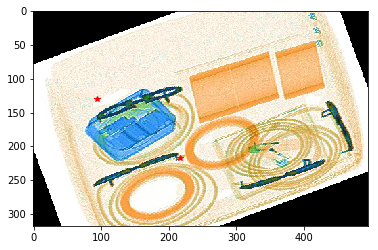

In [124]:
out1 = img.rotate(20)
new_x1,new_y1 = rotate_point(img.height,img.width,point1,20)
new_x2,new_y2 = rotate_point(img.height,img.width,point2,20)
new_x3,new_y3 = rotate_point(img.height,img.width,point3,20)
new_x4,new_y4 = rotate_point(img.height,img.width,point4,20)

grand_x1 = min(new_x1,new_x2,new_x3,new_x4)
grand_x2 = max(new_x1,new_x2,new_x3,new_x4)
grand_y1 = min(new_y1,new_y2,new_y3,new_y4)
grand_y2 = max(new_y1,new_y2,new_y3,new_y4)

plt.imshow(out1)
plt.plot(grand_x1,grand_y1,'r*')
plt.plot(grand_x2,grand_y2,'r*')
# plt.plot(new_x3,new_y3,'r*')
# plt.plot(new_x4,new_y4,'r*')

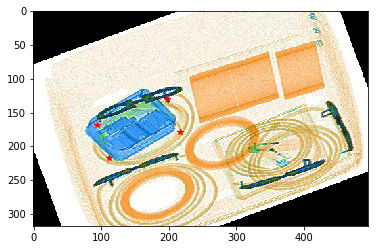

In [126]:
plt.imshow(out1)
plt.plot(new_x1,new_y1,'r*')
plt.plot(new_x2,new_y2,'r*')
plt.plot(new_x3,new_y3,'r*')
plt.plot(new_x4,new_y4,'r*')